# Ⅰ. Hand Craft Model

#### 0. 라이브러리

In [117]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.lines as mlines

from music21 import *

#### 1. Midi Stream 불러오기

In [4]:
def open_midi_folder(file_name):
    mid = midi.MidiFile()
    mid.open(file_name)
    
    mid.read()
    mid.close()
    
    mid_stream = midi.translate.midiFileToStream(mid)
    
    return mid, mid_stream

#### 2. Midi Data 불러오기

#### (0). Midi Stream Parts
- mid.parts.stream() // instruments set ( Piano 1개 ) : len(mid.parts) = 2 Right / Left
- mid.parts.stream().partName

In [15]:
def midi_parts_stream(mid_stream):
    print(f"stream len: ({len(mid_stream.parts)})")
    mid_stream_parts = [mid_stream_part for mid_stream_part in mid_stream.parts]
    
    return mid_stream_parts

#### (1). 음정 ( note ) / 음표 ( pitch ) / Time ( offset )
- 음표 ( pitch )
    - 음의 높낮이
    - ps ( pitch space ) : 음높이를 일련의 숫자로 나타낸 값
- Time ( offset )
    - offset : 음표의 ( 시작 ) 시각
    - 단위 : 박자
    - offset (0) : stream 의 시작 부분
    - offset (2) : stream 시작 후, 2 박자 이후에 진행
    - test data VS actual data 를 비교 시, 이 offset 을 사용해야할 듯

#### (2). decibel ( 소리 크기 )
- decibel 을 추출하는 것이 의미가 있는 것인지
    - 실제로 모든 decibel 은 110 으로 동일
    - actual과 test music의 decibel 이 다르다고 한들, 평가 기준으로 적합한지

In [124]:
def extract_note(mid_stream_part):
    mid_notes = [] # data 기준, pitch ( 개별 pitch )
    mid_offset = []
    
    mid_pitches = []
    mid_pitches_ps = []
    mid_pitches_names = []
    
    mid_decibels = []
    
    def insert_note_info(note_element, pitch_element):
        mid_notes.append(note_element)
        mid_offset.append(note_element.offset)
        
        mid_pitches.append(pitch_element)
        mid_pitches_ps.append(max(0.0, pitch_element.ps))
        mid_pitches_names.append(pitch_element.name)
        
        mid_decibels.append(note_element.volume.velocity)
    
    for note_element in mid_stream_part.recurse().flat.notes:
        if isinstance(note_element, note.Note):
            insert_note_info(note_element, note_element.pitch)
            
        elif isinstance(note_element, chord.Chord):
            for pitch_element in note_element.pitches:
                insert_note_info(note_element, pitch_element)
                    
    
    return mid_notes, mid_offset, mid_pitches, mid_pitches_ps

#### (3). 셈여림 ( dynamic marking 명칭 변경 필요 )

In [ ]:
def extract_dynamic_marking(mid_stream_part):
    dynamic_marking = []
    dynamic_marking_
    for dm_element in mid_stream_part.recurse().getElementsByClass(dynamics.Dynamic):
        dynamic_marking.append(dm_element)
    print(dynamic_marking)

#### (2) Midi 데이터 시각화 
- ( 음표 / 음정 데이터 )

In [102]:
def midi_parts_countour(mid_notes, mid_offset, mid_pitches_ps):
    fig = plt.figure(figsize=(12,5))
    ax = fig.add_subplot(1,1,1)
    
    minPitch = pitch.Pitch('C10').ps
    maxPitch = 0
    
    xMax = 0
    
    # x = offset ( 박자 ) y = 음의 높낮이 ( pitch)
    ax.scatter(mid_offset, mid_pitches_ps, alpha=0.6, s=7)
    
    if (min(mid_pitches_ps) < minPitch) : minPitch = min(mid_pitches_ps)
    
    if (max(mid_pitches_ps) > maxPitch) : maxPitch = max(mid_pitches_ps)
    
    if (max(mid_offset) > xMax): xMax = max(mid_offset)
    
    for i in range(1,10):
        linePitch = pitch.Pitch('C{0}'.format(i)).ps # 왜 C{0} 으로 했는지
        if (linePitch > minPitch and linePitch <= maxPitch):
            ax.add_line(mlines.Line2D([0, xMax], [linePitch, linePitch], color='red', alpha=0.1))
            
    plt.ylabel("Note index (each octave has 12 notes)")
    plt.xlabel("Number of quarter notes (beats)")
    plt.title('Voices motion approximation, each color is a different instrument, red lines show each octave')
    plt.show()
    
    
    
    

stream len: (9)
Taken from:


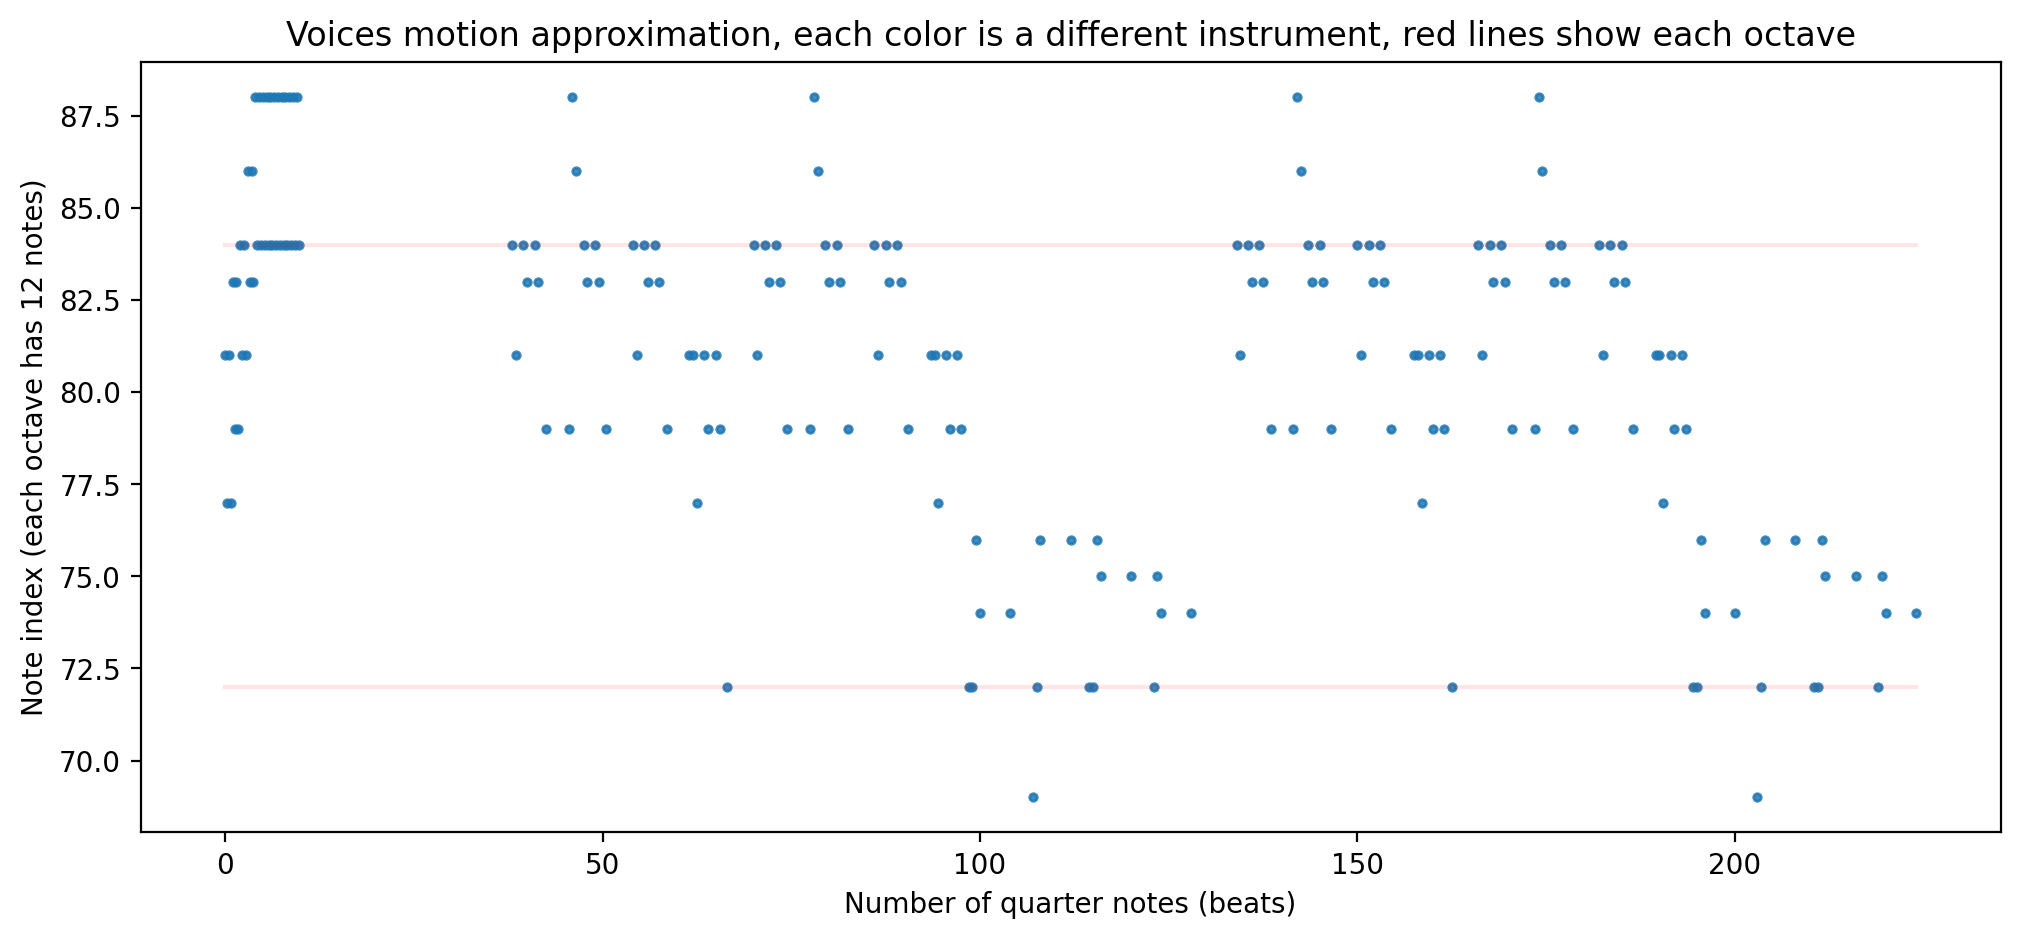

AttributeError: 'Part' object has no attribute 'dynamics'

In [134]:
def midi_file_processing(midi_folder):
    current_dir   = os.getcwd()
    midi_data_dir = os.path.join(current_dir, midi_folder)
    
    midi_file_list = os.listdir(midi_data_dir)
    for file in midi_file_list:
        file_name = os.path.join(midi_data_dir, file)
        
        # midi 파일 불러오기
        mid, mid_stream = open_midi_folder(file_name)
        
        # midi stream part (Right / Left)
        mid_stream_parts = midi_parts_stream(mid_stream)
        for part in mid_stream_parts:
            print(f"{part.partName}")
            mid_notes, mid_offset, mid_pitches, mid_pitches_ps = extract_note(part)
            
            midi_parts_countour(mid_notes, mid_offset, mid_pitches_ps) # 박자 단위
            
            
            ###########################################################################
            #pitch_histogram = graph.plot.HistogramPitchSpace(mid_stream)
            #print(pitch_histogram.id)
            #pitch_histogram.run()
            ###########################################################################
            
            # offset uniqe ( offset 통일성 )
            # np.unique(mid_offset, axis=0)
            
            
            
        break
        
        
midi_data_dir = "midi_data"

midi_file_processing(midi_data_dir)

In [131]:
midi_folder = "midi_data"

current_dir   = os.getcwd()
midi_data_dir = os.path.join(current_dir, midi_folder)
    
midi_file_list = os.listdir(midi_data_dir)
for file in midi_file_list:
    file_name = os.path.join(midi_data_dir, file)
        
        # midi 파일 불러오기
    mid, mid_stream = open_midi_folder(file_name)
        
    # midi stream part (Right / Left)
    mid_stream_parts = midi_parts_stream(mid_stream)
    for part in mid_stream_parts:
        print(f"{part.partName}")
        mid_notes, mid_offset, mid_pitches, mid_pitches_ps = extract_note(part)
        
        print(len(part.recurse().getElementsByClass(dynamics.Dynamic)))
        dynamic_markings = []
        for el in part.recurse().getElementsByClass(dynamics.Dynamic):
            dynamic_markings.append(el)
        print(dynamic_markings)
    break
            

stream len: (2)
Right Hand
0
[]
Left Hand
0
[]


In [ ]:
struct {
    int x
    int y
}

In [82]:
usic_stream = stream.Score()
usic_stream

NameError: name 'stream' is not defined

[고민]
1. 음정 pitch, ps, Chord.chord 에 대한 개념이 별로 없으니까 어렵ㄷ
2. 예를 들면 하나의 stream.part에서 stream.part.notes() 와 stream.part.recursive().notes 랑 다른데 뭐가 다른지 알아보려면 이걸 찾는 과정도 오래걸리고
    이걸 찾으면서 서브stream 에 대한 내용이라는데 이 서브 스트림이 음악에서 말하는 것이 어떤 것인지 잘 모르겠고
3. Chord 화음이라는 것이 인간이 칠 수 있는 두 손가락이라고 생각하는데 어떻게 3개가 동시에 켜질 수 있는지도 의문이고
4. 코드에 대한 이해, 실제 코드를 해보는 작업, 이론에 대한 이해, 우리 코드에 맞게 작업하는 과정이 오래걸림
5. 또 예를 들면, minPitch = pitch.Pitch('C10').ps 이렇게 코드에는 나와있는데 실제로는 Pitch 의 min 값은 몇인지에 대한 배경지식이 없음